# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

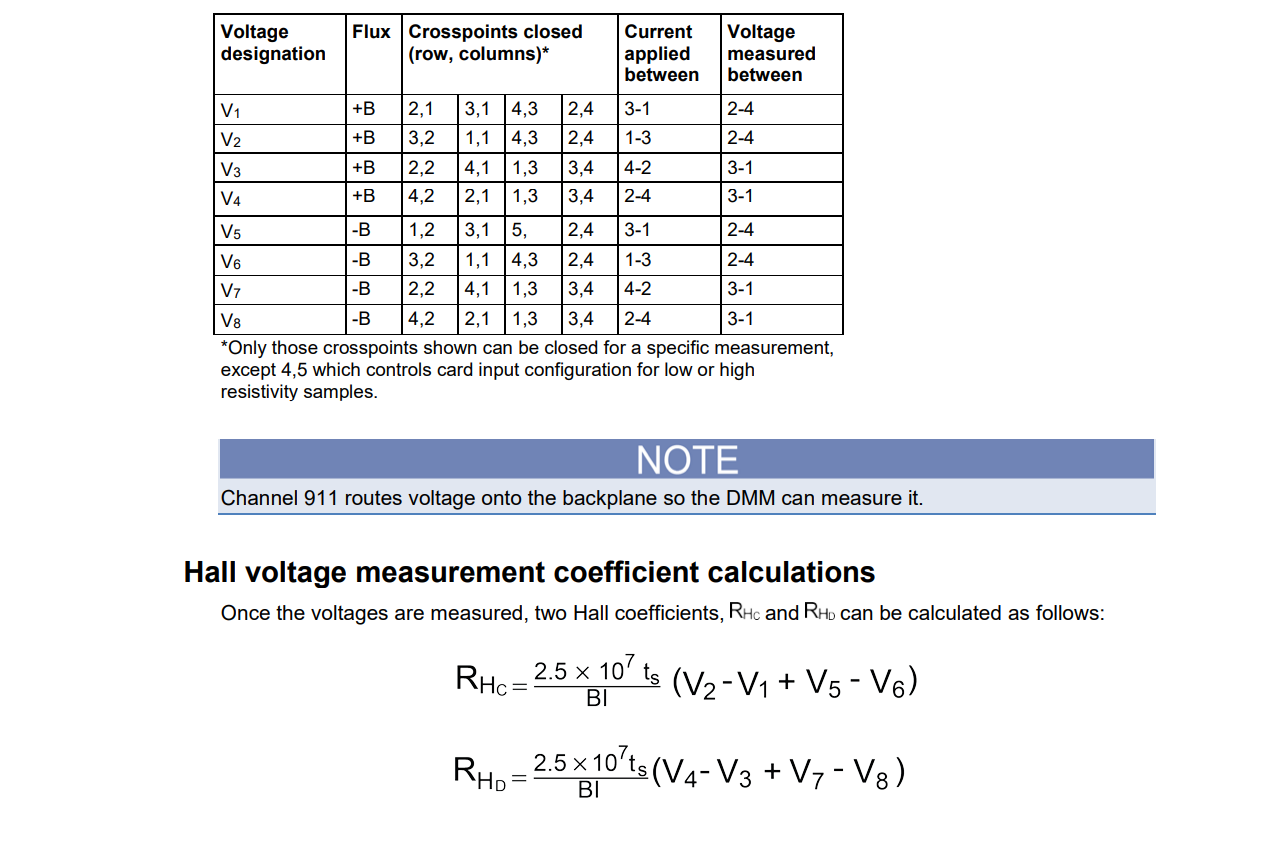

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [30]:
truncate = False # True it contains data from O to Bmax
path = r"C:\Users\Admin\Desktop\Analysis\Data\A302\HALL\Archive"
filename = 'A302_DSO_2p_to_2n_200K.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


I             B           T         V1         V2         V3  \
0    0.00002  19999.860742  200.075060 -90.335876  90.390930  90.074230   
1    0.00002  19000.291406  200.017908 -90.321327  90.362924  90.060060   
2    0.00002  18000.375586  200.010159 -90.312053  90.361836  90.075559   
3    0.00002  17000.606348  200.006781 -90.308128  90.379100  90.097508   
4    0.00002  16000.259717  200.005473 -90.325255  90.364915  90.141591   
..       ...           ...         ...        ...        ...        ...   
101  0.00002  16000.313916  200.000395 -90.307370  90.365509  90.093445   
102  0.00002  17000.024414  200.000449 -90.301025  90.341888  90.075230   
103  0.00002  18000.196191  200.000789 -90.297792  90.331232  90.066313   
104  0.00002  19000.138965  200.000767 -90.271514  90.324989  90.045792   
105  0.00002  20000.521289  200.000238 -90.275361  90.318220  90.019586   

            V4     Rel_value  multiplier  
0   -90.035421  9.369000e-07   1000000.0  
1   -90.040433  8.610000e-07   1000000.0  
2   -90.059199  7.857000e-07   1000000.0  
3   -90.063512  7.239000e-07   1000000.0  
4   -90.093468  6.744000e-07   1000000.0  
..         ...           ...         ...  
101 -90.069899  5.508000e-07   1000000.0  
102 -90.037782  5.505000e-07   1000000.0  
103 -90.028123  5.532000e-07   1000000.0  
104 -90.008272  5.519000e-07   1000000.0  
105 -89.982938  5.470000e-07   1000000.0  

[106 rows x 9 columns]

### Converting B to integer B

In [31]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [32]:
(df['V1'], df['V3']) = (df['V3'], df['V1'])
(df['V2'], df['V4']) = (df['V4'], df['V2'])
df.head()

I             B  B_int           T         V1         V2         V3  \
0  0.00002  19999.860742  20000  200.075060  90.074230 -90.035421 -90.335876   
1  0.00002  19000.291406  19000  200.017908  90.060060 -90.040433 -90.321327   
2  0.00002  18000.375586  18000  200.010159  90.075559 -90.059199 -90.312053   
3  0.00002  17000.606348  17000  200.006781  90.097508 -90.063512 -90.308128   
4  0.00002  16000.259717  16000  200.005473  90.141591 -90.093468 -90.325255   

          V4     Rel_value  multiplier  
0  90.390930  9.369000e-07   1000000.0  
1  90.362924  8.610000e-07   1000000.0  
2  90.361836  7.857000e-07   1000000.0  
3  90.379100  7.239000e-07   1000000.0  
4  90.364915  6.744000e-07   1000000.0

In [33]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

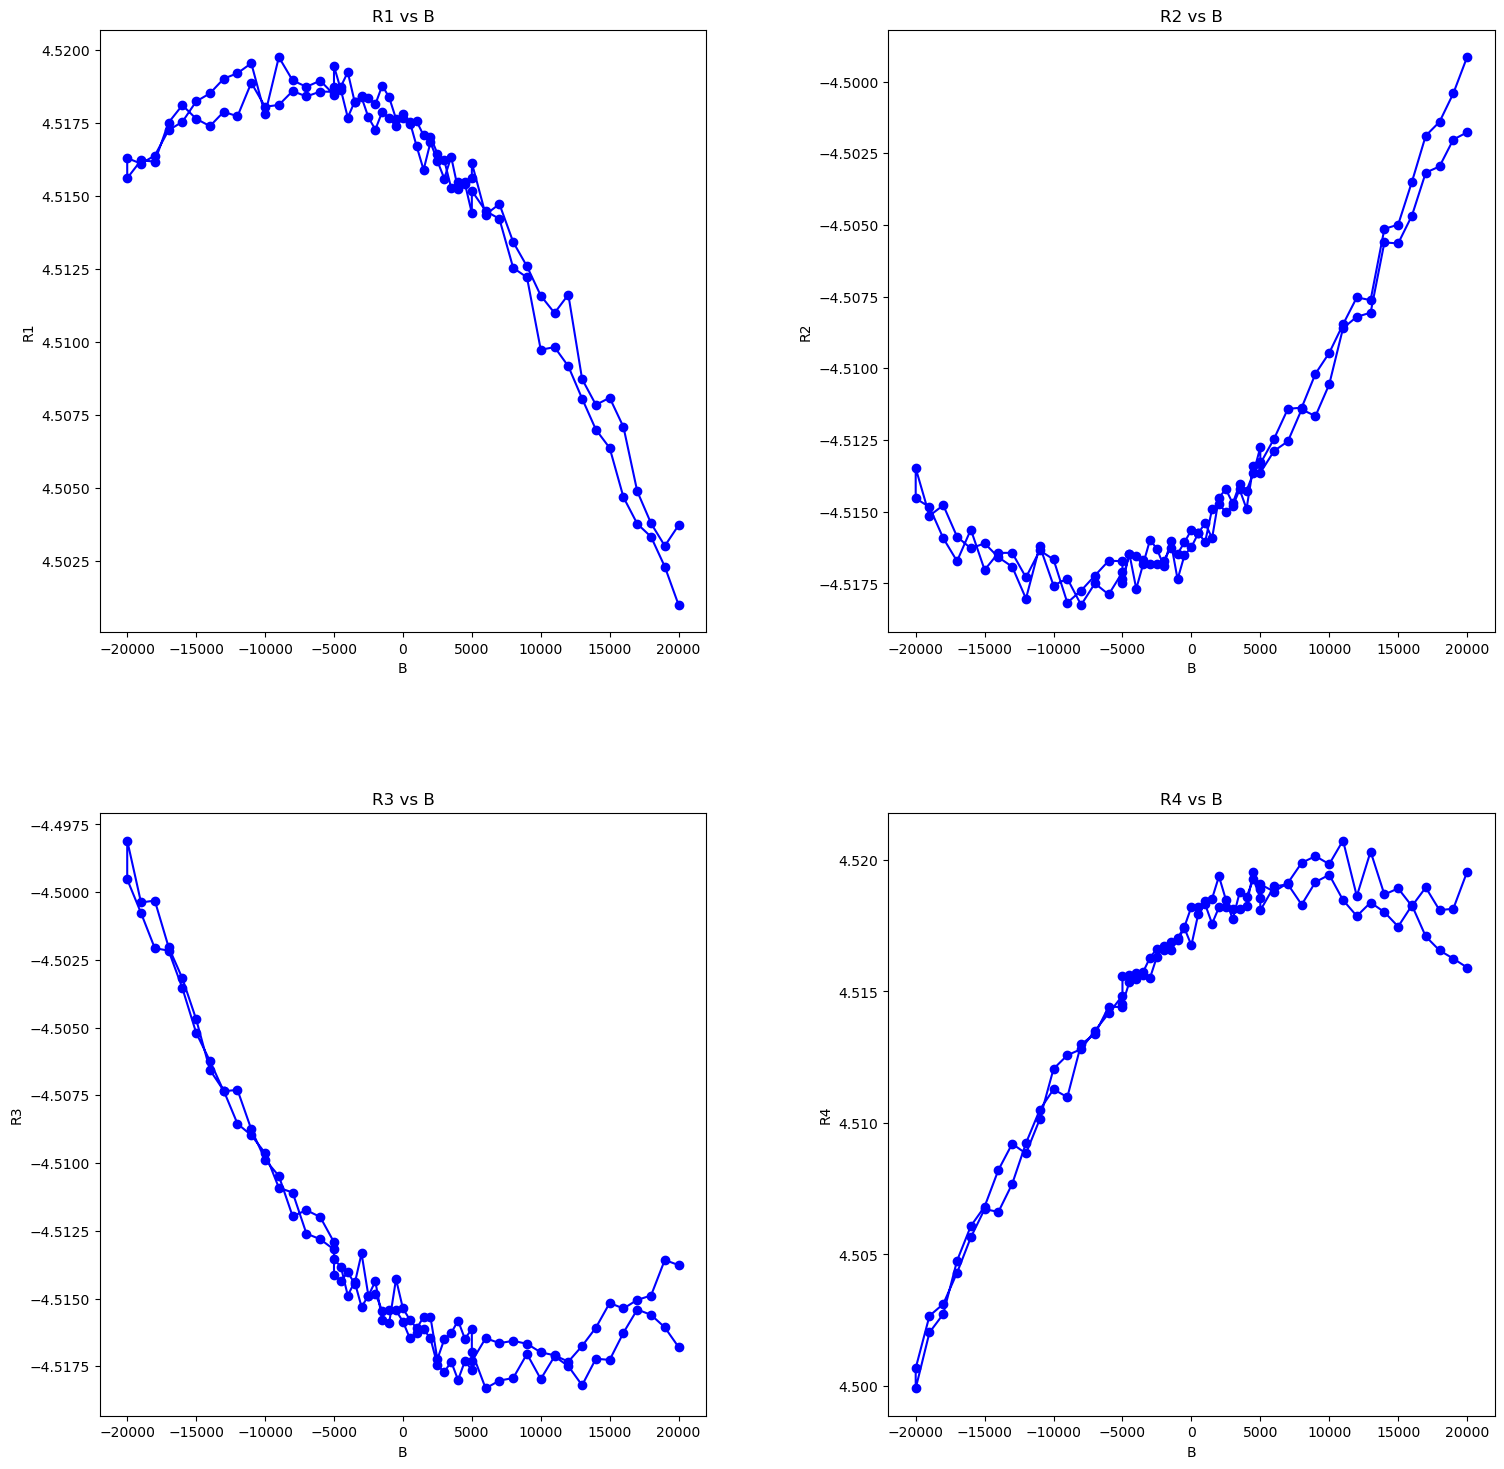

In [34]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [35]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [36]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

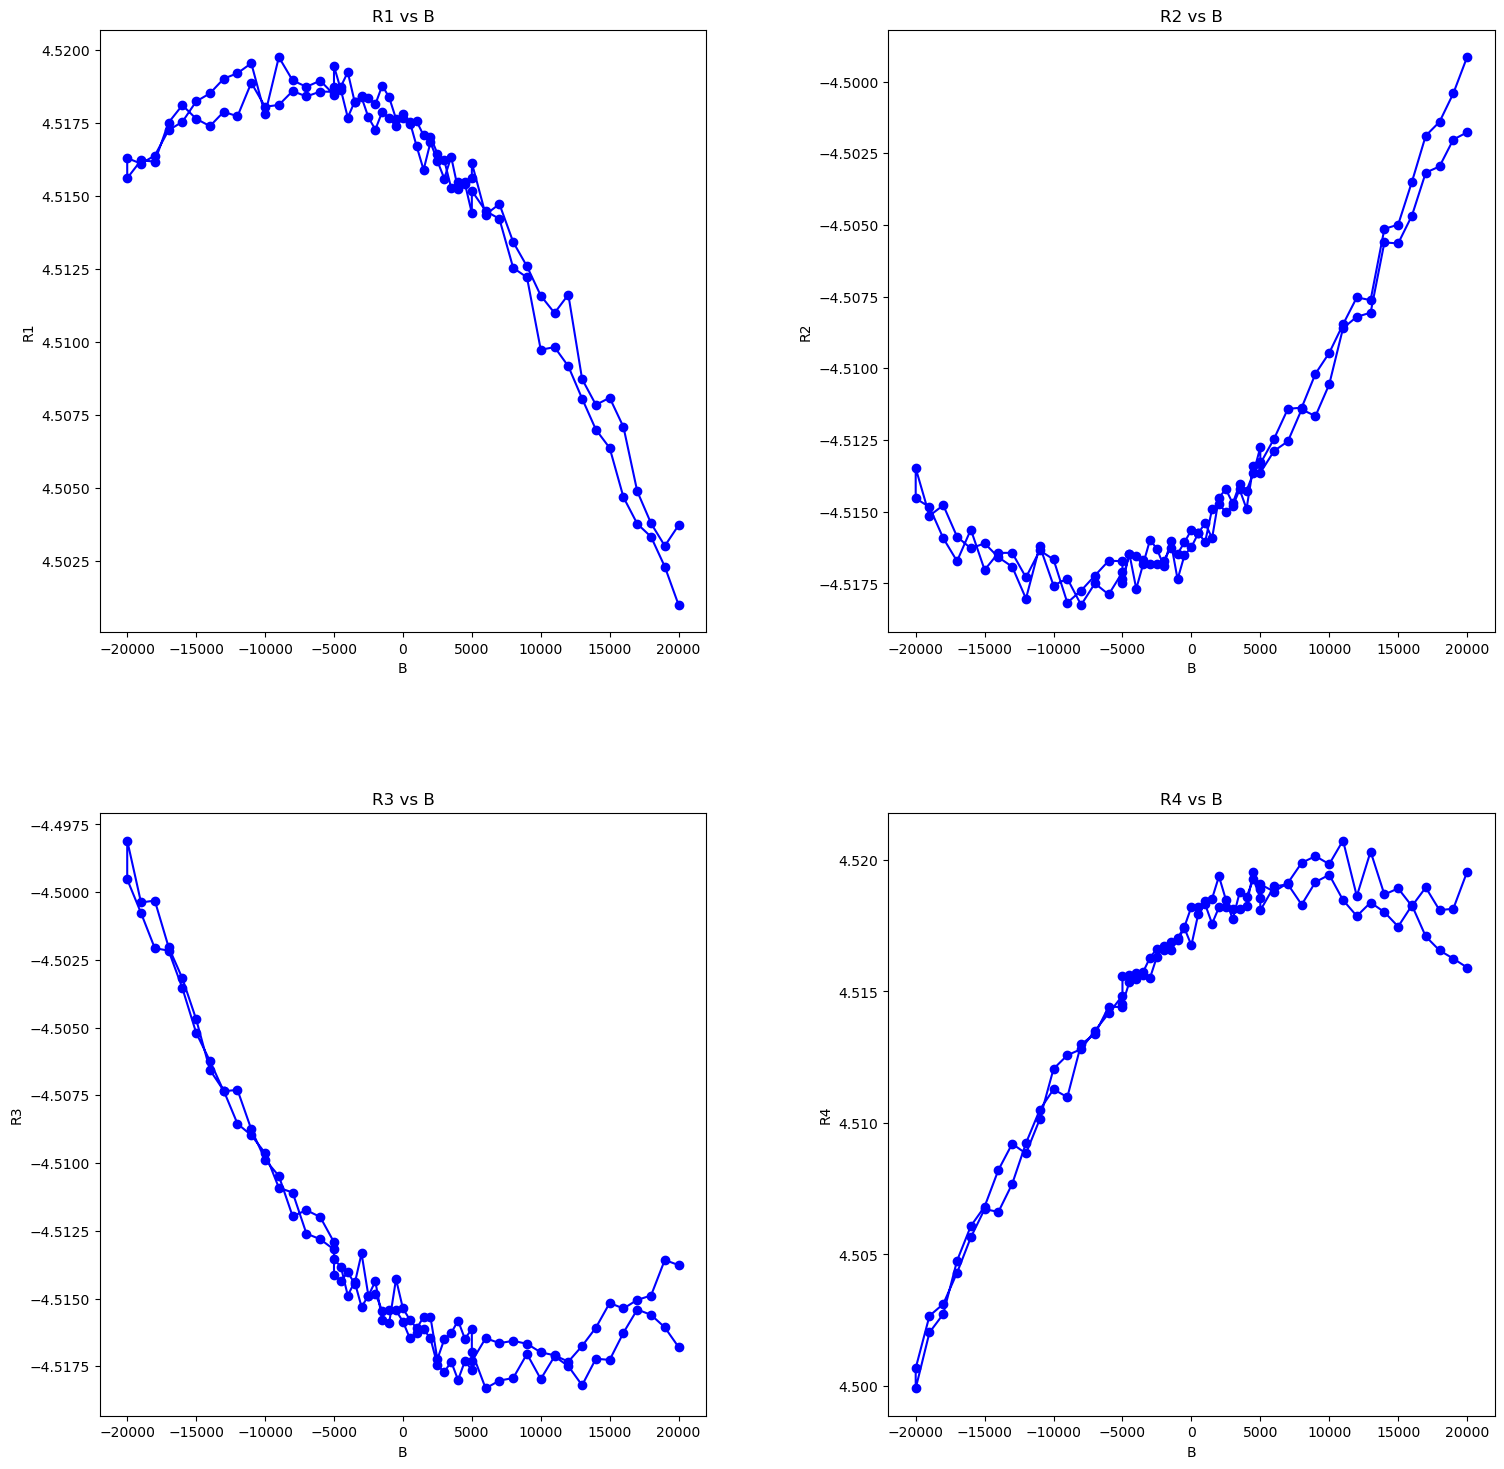

In [37]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [38]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

20000 -20000


In [39]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

52

In [40]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [41]:
df_dec.head()

I             B  B_int           T         V1         V2         V3  \
0  0.00002  19999.860742  20000  200.075060  90.074230 -90.035421 -90.335876   
1  0.00002  19000.291406  19000  200.017908  90.060060 -90.040433 -90.321327   
2  0.00002  18000.375586  18000  200.010159  90.075559 -90.059199 -90.312053   
3  0.00002  17000.606348  17000  200.006781  90.097508 -90.063512 -90.308128   
4  0.00002  16000.259717  16000  200.005473  90.141591 -90.093468 -90.325255   

          V4     Rel_value  multiplier  
0  90.390930  9.369000e-07   1000000.0  
1  90.362924  8.610000e-07   1000000.0  
2  90.361836  7.857000e-07   1000000.0  
3  90.379100  7.239000e-07   1000000.0  
4  90.364915  6.744000e-07   1000000.0

In [42]:
df_inc.head()

I             B  B_int           T         V1         V2         V3  \
53  0.00002 -20000.293945 -20000  200.000499  90.312219 -90.290666 -89.990555   
54  0.00002 -19000.392480 -19000  200.000990  90.324424 -90.296796 -90.015330   
55  0.00002 -18000.276074 -18000  200.001163  90.323579 -90.318477 -90.041334   
56  0.00002 -17000.246484 -17000  200.000167  90.350308 -90.334491 -90.043136   
57  0.00002 -16000.294043 -16000  200.000982  90.362268 -90.312464 -90.070815   

           V4     Rel_value  multiplier  
53  90.013610  5.668000e-07   1000000.0  
54  90.053366  5.642000e-07   1000000.0  
55  90.062361  5.669000e-07   1000000.0  
56  90.086130  5.864000e-07   1000000.0  
57  90.113043  5.561000e-07   1000000.0

In [43]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [44]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

I      B           T         V1         V2         V3         V4  \
0  0.00002  20000  200.075060  90.074230 -90.035421 -90.335876  90.390930   
1  0.00002  19000  200.017908  90.060060 -90.040433 -90.321327  90.362924   
2  0.00002  18000  200.010159  90.075559 -90.059199 -90.312053  90.361836   
3  0.00002  17000  200.006781  90.097508 -90.063512 -90.308128  90.379100   
4  0.00002  16000  200.005473  90.141591 -90.093468 -90.325255  90.364915   

          V5         V6         V7         V8  multiplier  
0  90.312219 -90.290666 -89.990555  90.013610   1000000.0  
1  90.324424 -90.296796 -90.015330  90.053366   1000000.0  
2  90.323579 -90.318477 -90.041334  90.062361   1000000.0  
3  90.350308 -90.334491 -90.043136  90.086130   1000000.0  
4  90.362268 -90.312464 -90.070815  90.113043   1000000.0

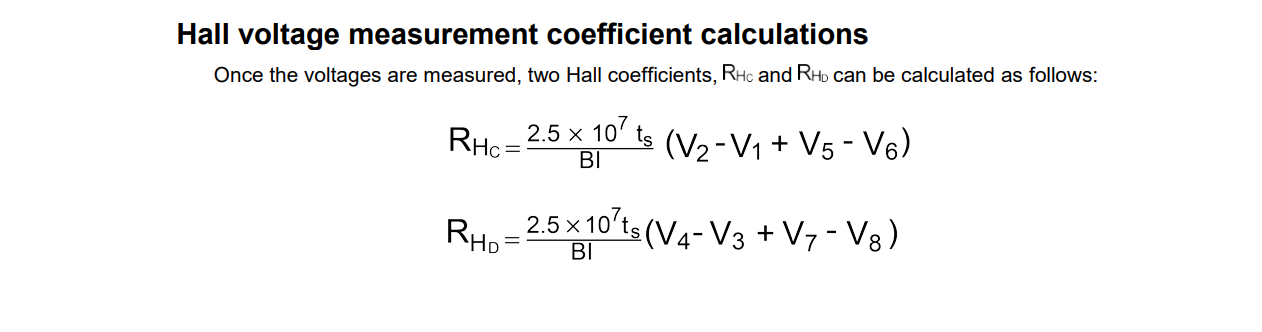
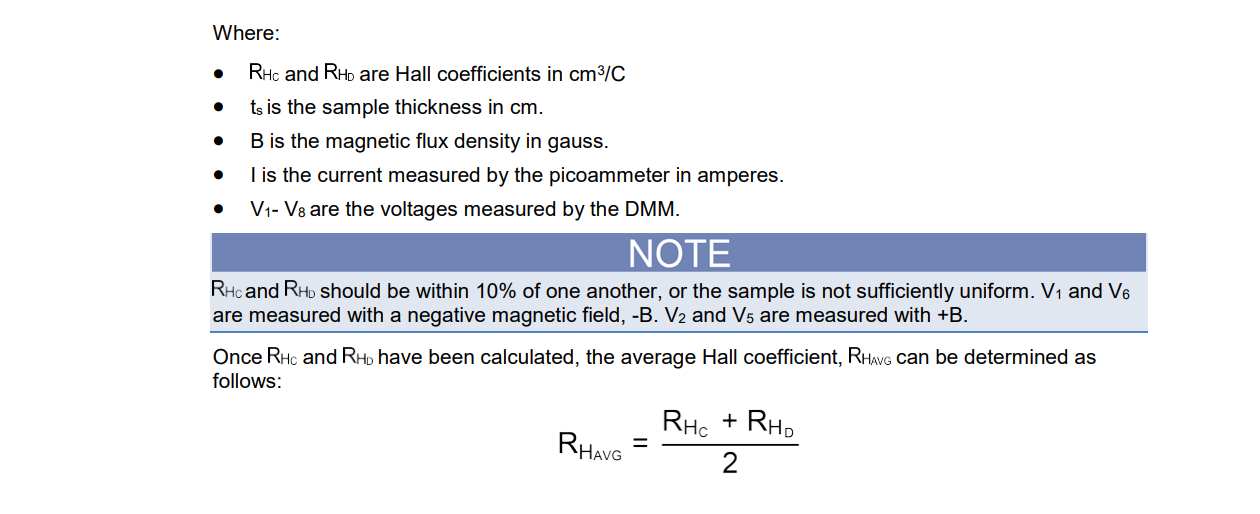

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [45]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

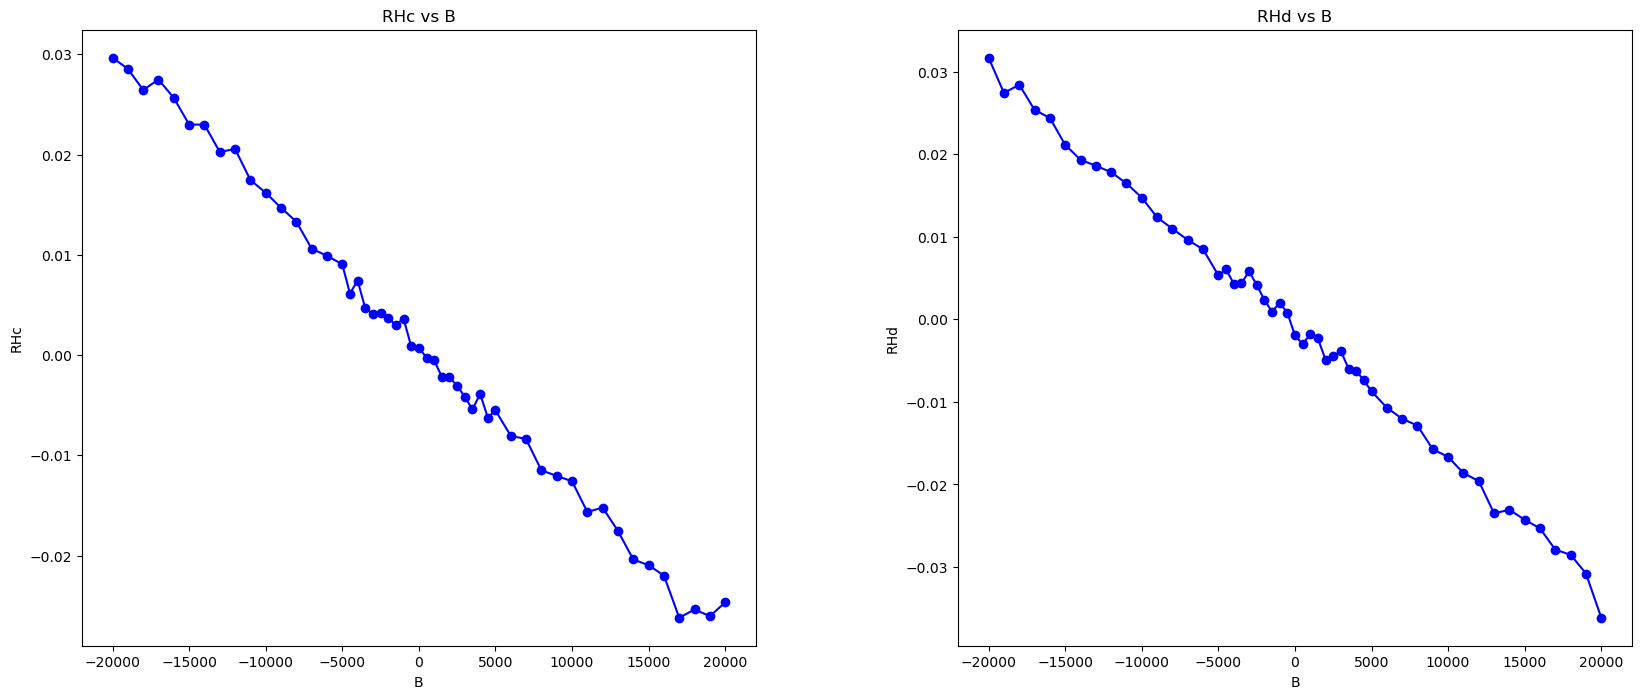

In [46]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

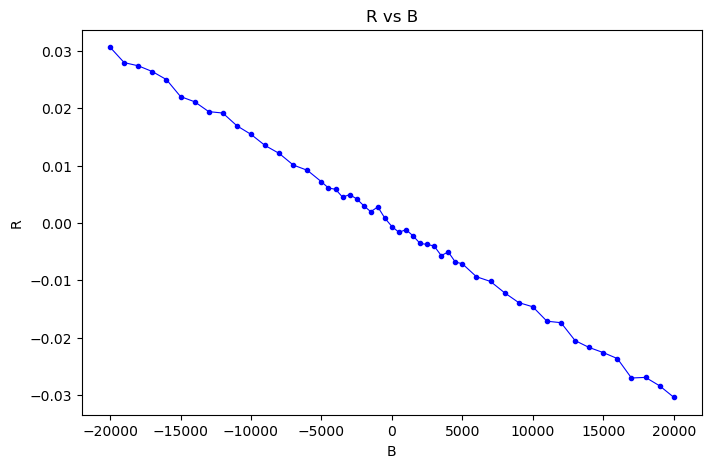

In [47]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [48]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

I      B           T         V1         V2         V3         V4  \
0  0.00002 -20000  200.000499  90.312219 -90.290666 -89.990555  90.013610   
1  0.00002 -19000  200.000990  90.324424 -90.296796 -90.015330  90.053366   
2  0.00002 -18000  200.001163  90.323579 -90.318477 -90.041334  90.062361   
3  0.00002 -17000  200.000167  90.350308 -90.334491 -90.043136  90.086130   
4  0.00002 -16000  200.000982  90.362268 -90.312464 -90.070815  90.113043   

          V5         V6         V7         V8  multiplier  
0  90.074230 -90.035421 -90.335876  90.390930   1000000.0  
1  90.060060 -90.040433 -90.321327  90.362924   1000000.0  
2  90.075559 -90.059199 -90.312053  90.361836   1000000.0  
3  90.097508 -90.063512 -90.308128  90.379100   1000000.0  
4  90.141591 -90.093468 -90.325255  90.364915   1000000.0

### Hall resistance calculation

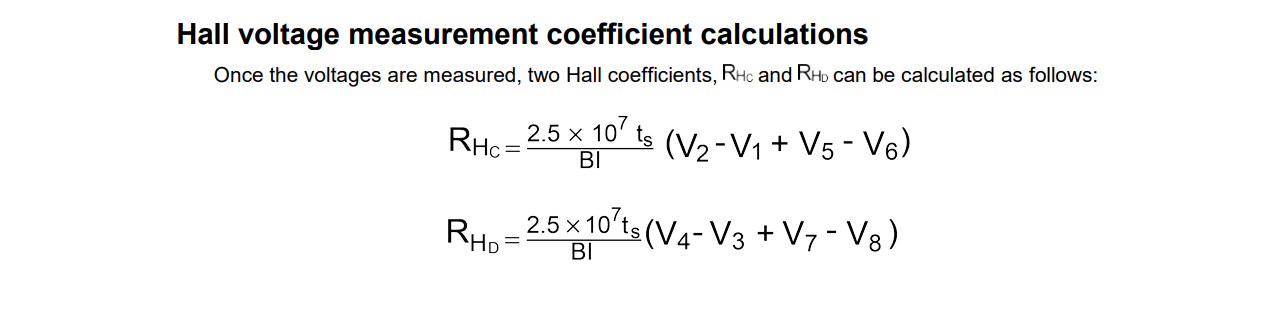

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [49]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

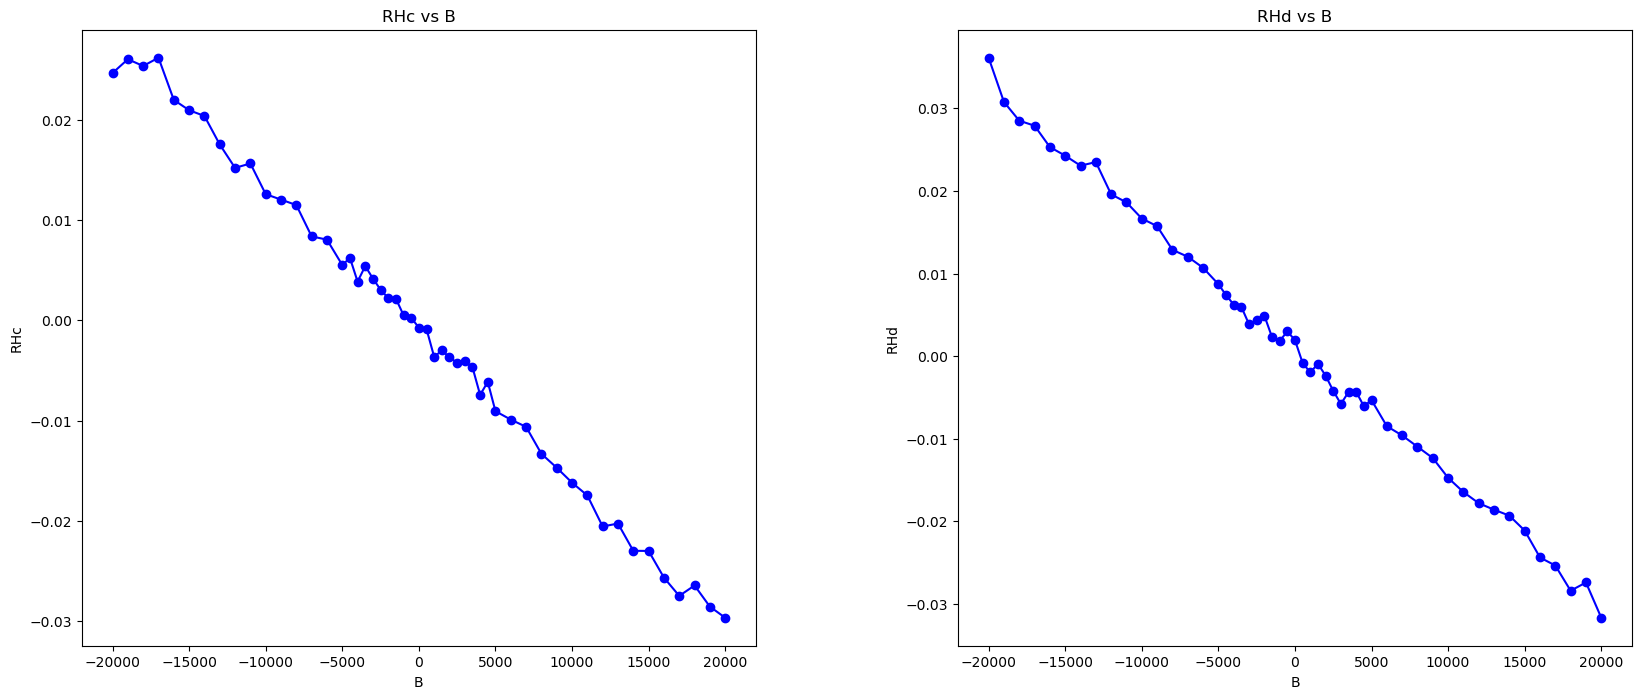

In [50]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

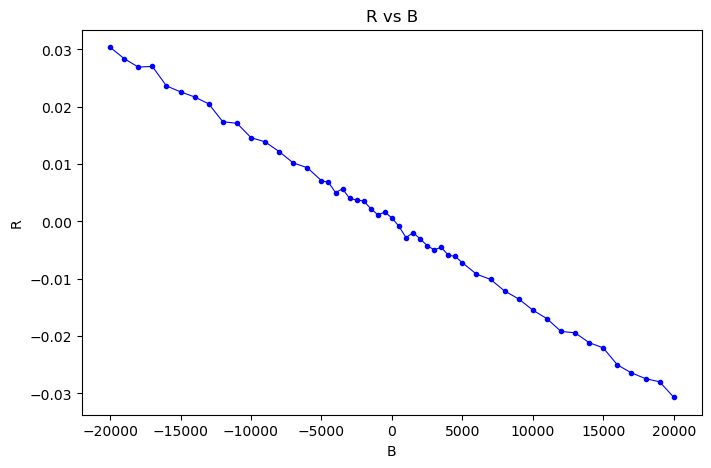

In [51]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

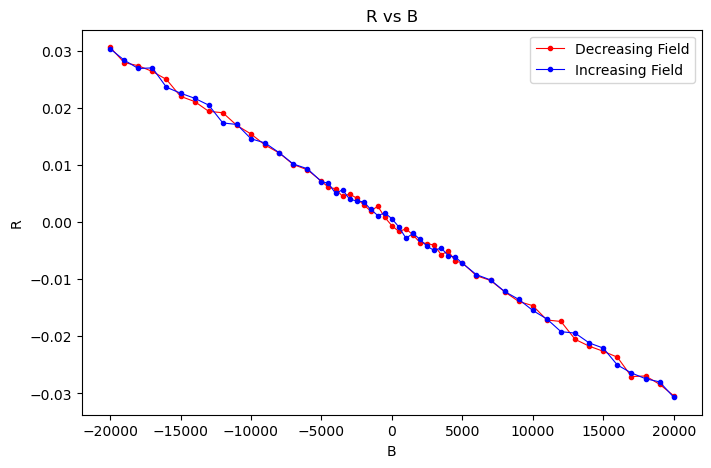

In [52]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [53]:
data = pd.concat([data_dec,data_inc])
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{filename}')